In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
from scipy.interpolate import griddata
import xarray as xr
import pandas as pd

import matplotlib.pyplot as plt
import cartopy as cart
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean

from datetime import timedelta as delta
from datetime import datetime

import networkx as nx

from parcels import (grid, Field, FieldSet, ParticleSet, JITParticle, ScipyParticle, AdvectionRK4,
                     ErrorCode, ParticleFile, Variable, plotTrajectoriesFile)

from importlib import reload
import sys
sys.path.append('/science/users/4302001/arctic-connectivity/tools')
sys.path.append('/Users/daanreijnders/surfdrive/Thesis/repo/tools')
import plot
import lifeline
import community
import fieldsetter_cmems
import advectParticles

Stripy is not available on this machine.


In [9]:
reload(plot)
reload(lifeline)
reload(community)
reload(fieldsetter_cmems)
reload(advectParticles)

Stripy is not available on this machine.


<module 'advectParticles' from '/science/users/4302001/arctic-connectivity/tools/advectParticles.py'>

In [4]:
readdir_ocean = '/data/oceanparcels/input_data/CESM/0.1_deg/rcp8.5/ocean/arctic/'
readdir_ice = '/data/oceanparcels/input_data/CESM/0.1_deg/control/ice/arctic/'
readdir_mesh = '/scratch/DaanR/fields/'

fieldfile_ocean = 'daily_CESM_0.1degree_rcp8.5run_years_2000-2010_arctic.nc'
fieldfile_ice = 'monthly_icefields_CESM_0.1degree_controlrun_year_300_arctic.nc'
meshfile = 'POP_grid_coordinates.nc'

writedir = '/scratch/DaanR/psets/'

In [5]:
pfile = xr.open_dataset("/data/oceanparcels/output_data/data_Daan/psets/pset_Rcmems_Pico11_S2001-1-1_D90_DT20_ODT24.nc", decode_cf=True)

Check how many particles have a latitude higher than 90 degrees? Do they 'cross' the pole?

In [6]:
np.sum(pfile.lat[:,-1]>90)

<xarray.DataArray 'lat' ()>
array(0)

In [10]:
pfile.lon.shape

(1402308, 91)

Nope

Create a scatter plot with particle loaction at end of run:

(<Figure size 432x288 with 1 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7fb8c94bb128>)

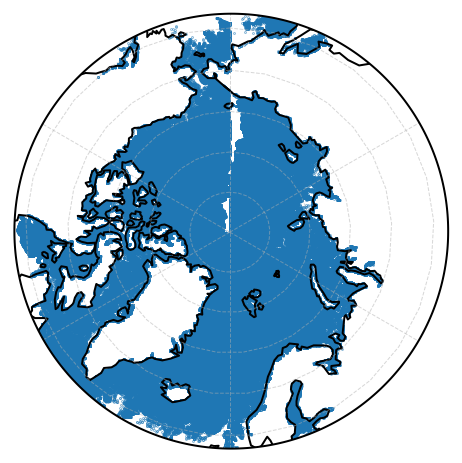

In [11]:
plot.scatter_from_dataset(pfile.lon[:,-1], pfile.lat[:,-1], polar=True, s=0.05, latRange=(58,90), lonRange=(-180,180))

A lot of space is unoccupied by particles. What could be the cause of this? Also, notice the horizontal line around -80 degrees. What is happening here?

(<Figure size 432x288 with 1 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f314a220828>)

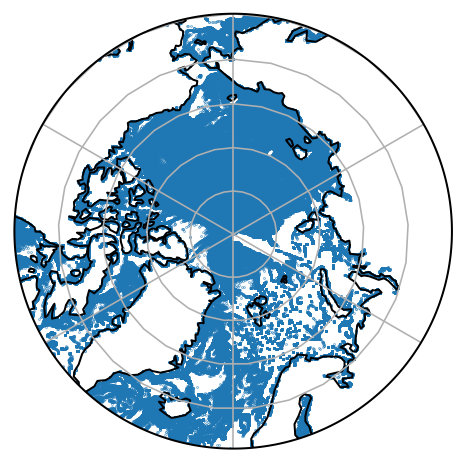

In [17]:
plot.scatter_from_dataset(pfile.lon[:,30], pfile.lat[:,30], polar=True, s=0.05, latRange=(60,90))

In [ ]:
pfile = xr.open_dataset('/data/oceanparcels/output_data/data_Daan/psets/pset_Rrcp85_Piconorth11_S2000-01-9_D90_DT20_ODT24_LAT60-90_LON-180-180.nc', decode_cf=True)